<a href="https://colab.research.google.com/github/gideon525/Business-Location/blob/main/Predictive_Maintenance_for_Wind_Turbine_Generators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective:** Develop and compare machine learning models to predict wind turbine generator failures, selecting the one that minimizes total operational and maintenance costs based on a specific business-defined cost structure.

**Installing and Importing the necessary libraries**
# Import the necessary libraries for data handling, visualization, and machine learning

In [72]:
# --- Data Manipulation and Analysis ---
import pandas as pd
import numpy as np

# --- Data Visualization ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Machine Learning: Preprocessing ---
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

# --- Machine Learning: Models ---
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
# TensorFlow and Keras for Neural Network models
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# --- Machine Learning: Evaluation ---
from sklearn.metrics import confusion_matrix, classification_report, make_scorer, f1_score

# --- General Settings ---
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

**Data Loading**
# load the Train.csv and Test.csv files into pandas DataFrames.


In [73]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
train_df = pd.read_csv('/content/drive/MyDrive/UTAustin/Train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/UTAustin/Test.csv')

**Data Overview**


In [75]:
print("--- Training Data Overview ---")
print(f"Shape: {train_df.shape}")


--- Training Data Overview ---
Shape: (20000, 41)


There are 20 rows o and 41 columns in the train data

In [76]:
print("\nInfo:")
train_df.info()



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  floa

The columns are are numerical data types

In [77]:

print("\n--- Descriptive Statistics of Training Data ---")
display(train_df.describe().T)


--- Descriptive Statistics of Training Data ---


,count,mean,std,min,25%,50%,75%,max
V1,19982.0,-0.271996,3.441625,-11.876451,-2.737146,-0.747917,1.840112,15.493002
V2,19982.0,0.440430,3.150784,-12.319951,-1.640674,0.471536,2.543967,13.089269
V3,20000.0,2.484699,3.388963,-10.708139,0.206860,2.255786,4.566165,17.090919
V4,20000.0,-0.083152,3.431595,-15.082052,-2.347660,-0.135241,2.130615,13.236381
V5,20000.0,-0.053752,2.104801,-8.603361,-1.535607,-0.101952,1.340480,8.133797
V6,20000.0,-0.995443,2.040970,-10.227147,-2.347238,-1.000515,0.380330,6.975847
V7,20000.0,-0.879325,1.761626,-7.949681,-2.030926,-0.917179,0.223695,8.006091
V8,20000.0,-0.548195,3.295756,-15.657561,-2.642665,-0.389085,1.722965,11.679495
V9,20000.0,-0.016808,2.160568,-8.596313,-1.494973,-0.067597,1.409203,8.137580
V10,20000.0,-0.012998,2.193201,-9.853957,-1.411212,0.100973,1.477045,8.108472


In [78]:
# Check for null values in the data frome
print("Total count of null values in the entire DataFrame:")
print(train_df.isnull().sum().sum())

Total count of null values in the entire DataFrame:
36


In [79]:

print("\n--- Count of Null Values Before Resolution ---")
null_counts_before = train_df.isnull().sum()
# Filter to show only columns with null values
null_columns_before = null_counts_before[null_counts_before > 0]
if not null_columns_before.empty:
    print(null_columns_before)
else:
    print("No null values found in the dataset.")

print("\n--- Percentage of Null Values Before Resolution ---")
if not null_columns_before.empty:
    null_percentage_before = (null_columns_before / len(train_df)) * 100
    print(null_percentage_before.sort_values(ascending=False))
else:
    print("No null values to display percentage for.")


--- Count of Null Values Before Resolution ---
V1    18
V2    18
dtype: int64

--- Percentage of Null Values Before Resolution ---
V1    0.09
V2    0.09
dtype: float64


since there are only a few rows with null values, those rows will be dropped

In [80]:
# create a copy of the train dataframe
train_df_resolved = train_df.copy()
print("\n--- Applying Null Value Resolution Strategies ---")

# 1. Drop Rows with Null Values
train_df_resolved.dropna(inplace=True)
print("\nStrategy: Dropped rows with any null values.")
print(f"New DataFrame shape after dropping rows: {train_df_resolved.shape}")


--- Applying Null Value Resolution Strategies ---

Strategy: Dropped rows with any null values.
New DataFrame shape after dropping rows: (19964, 41)


In [81]:
# Check after the resolution, the number of null values in the rows
print("\n--- Count of Null Values After Resolution ---")
null_counts_after = train_df_resolved.isnull().sum()
null_columns_after = null_counts_after[null_counts_after > 0]
if not null_columns_after.empty:
    print(null_columns_after)
else:
    print("No null values remaining in the DataFrame.")


--- Count of Null Values After Resolution ---
No null values remaining in the DataFrame.


In [82]:
# --- Resolving Duplicate Values ---
print("\n--- Checking for Duplicate Rows ---")
duplicate_rows = train_df_resolved.duplicated()
num_duplicates = duplicate_rows.sum()

if num_duplicates > 0:
    print(f"Found {num_duplicates} duplicate rows in the DataFrame.")
    print("Example of duplicate rows (first 5, if any):")
    print(train_df_resolved[duplicate_rows].head())

    # Strategy: Remove duplicate rows
    train_df_resolved.drop_duplicates(subset=['col1', 'col2'], inplace=True)
    train_df_resolved.drop_duplicates(inplace=True)
    print(f"\nStrategy: Removed {num_duplicates} duplicate rows.")
    print(f"New DataFrame shape after removing duplicates: {train_df_resolved.shape}")
else:
    print("No duplicate rows found in the DataFrame.")

print("\n--- First 5 rows of DataFrame after all resolutions ---")
print(train_df_resolved.head())

print("\n--- Final DataFrame Info After All Resolutions ---")
train_df_resolved.info()



--- Checking for Duplicate Rows ---
No duplicate rows found in the DataFrame.

--- First 5 rows of DataFrame after all resolutions ---
         V1        V2        V3        V4        V5        V6        V7  \
0 -4.464606 -4.679129  3.101546  0.506130 -0.221083 -2.032511 -2.910870   
1  3.365912  3.653381  0.909671 -1.367528  0.332016  2.358938  0.732600   
2 -3.831843 -5.824444  0.634031 -2.418815 -1.773827  1.016824 -2.098941   
3  1.618098  1.888342  7.046143 -1.147285  0.083080 -1.529780  0.207309   
4 -0.111440  3.872488 -3.758361 -2.982897  3.792714  0.544960  0.205433   

         V8        V9       V10  ...       V32       V33        V34       V35  \
0  0.050714 -1.522351  3.761892  ...  3.059700 -1.690440   2.846296  2.235198   
1 -4.332135  0.565695 -0.101080  ... -1.795474  3.032780  -2.467514  1.894599   
2 -3.173204 -2.081860  5.392621  ... -0.257101  0.803550   4.086219  2.292138   
3 -2.493629  0.344926  2.118578  ... -3.584425 -2.577474   1.363769  0.622714   
4  4.848

In [83]:
print(f"Shape: {train_df_resolved.shape}")

Shape: (19964, 41)


*   The data set has now been processed for missing values and null values
*   The data consists of 19,964 training amples, each with 40 features.
*   All features are numerical, and there are no missing values.
*   The features have widely different scales, making feature scaling a mandatory preprocessing step.





**Exploratory Data Analysis**
# Univariate analysis
# Analyzing the target variable is crucial, especially for classification problems.

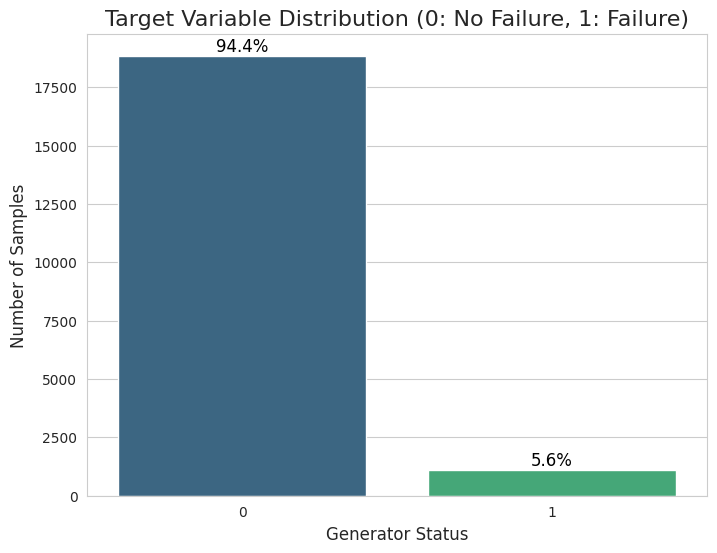

In [84]:
# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Target', data=train_df_resolved, palette='viridis')
plt.title('Target Variable Distribution (0: No Failure, 1: Failure)', fontsize=16)
plt.xlabel('Generator Status', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)

# Annotate bars with percentages
total = len(train_df_resolved)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12, color='black')
plt.show()

5.6 % belong to the failure class, which is suggestive of data imbalance. This wll be resolved subsequently

**Bivariate Analysis

```
Feature-To-Feature Correlations
```

**

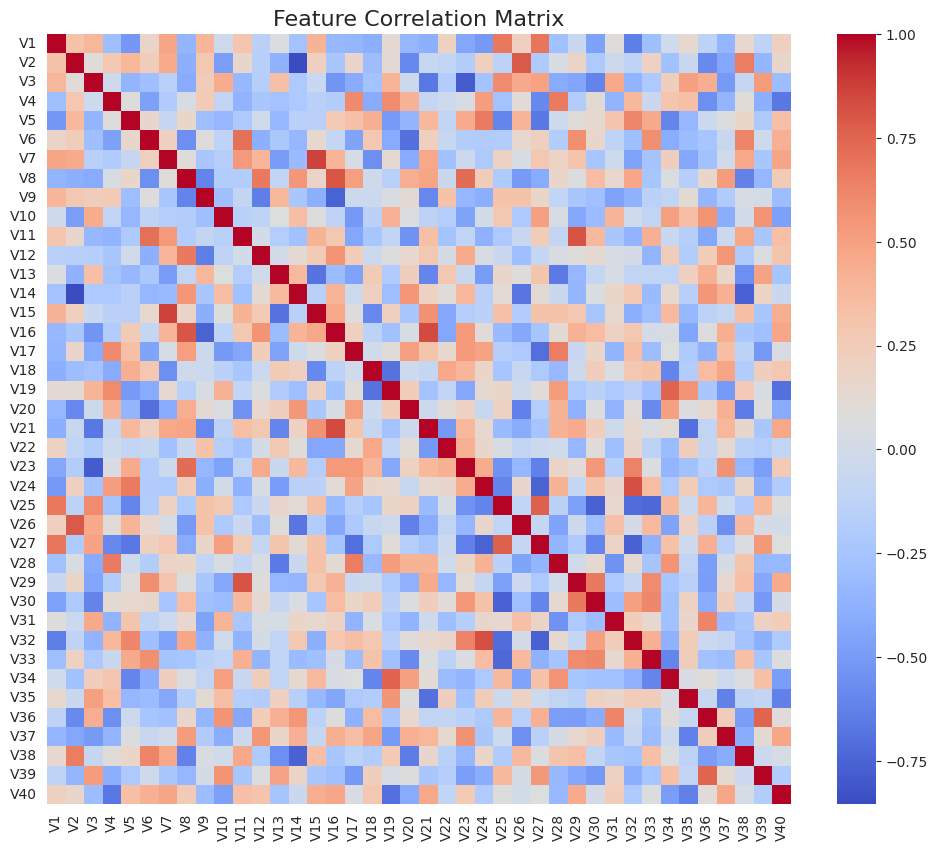

In [85]:
# Compute and plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(train_df_resolved.drop('Target', axis=1).corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Matrix', fontsize=16)
plt.show()

**Observation:** There are several clusters of correlated features. While tree-based models are less sensitive to this, it reinforces the need for powerful models such as Random Forest or XGBoost or neural networks (TensorFlow/Keras) that can handle complex inter-feature relationships.

**MORE EXPLORATORY DATA ANALYSIS**

**Checking Feature Distribution**


--- Univariate Analysis (Sample Feature Distribution) ---


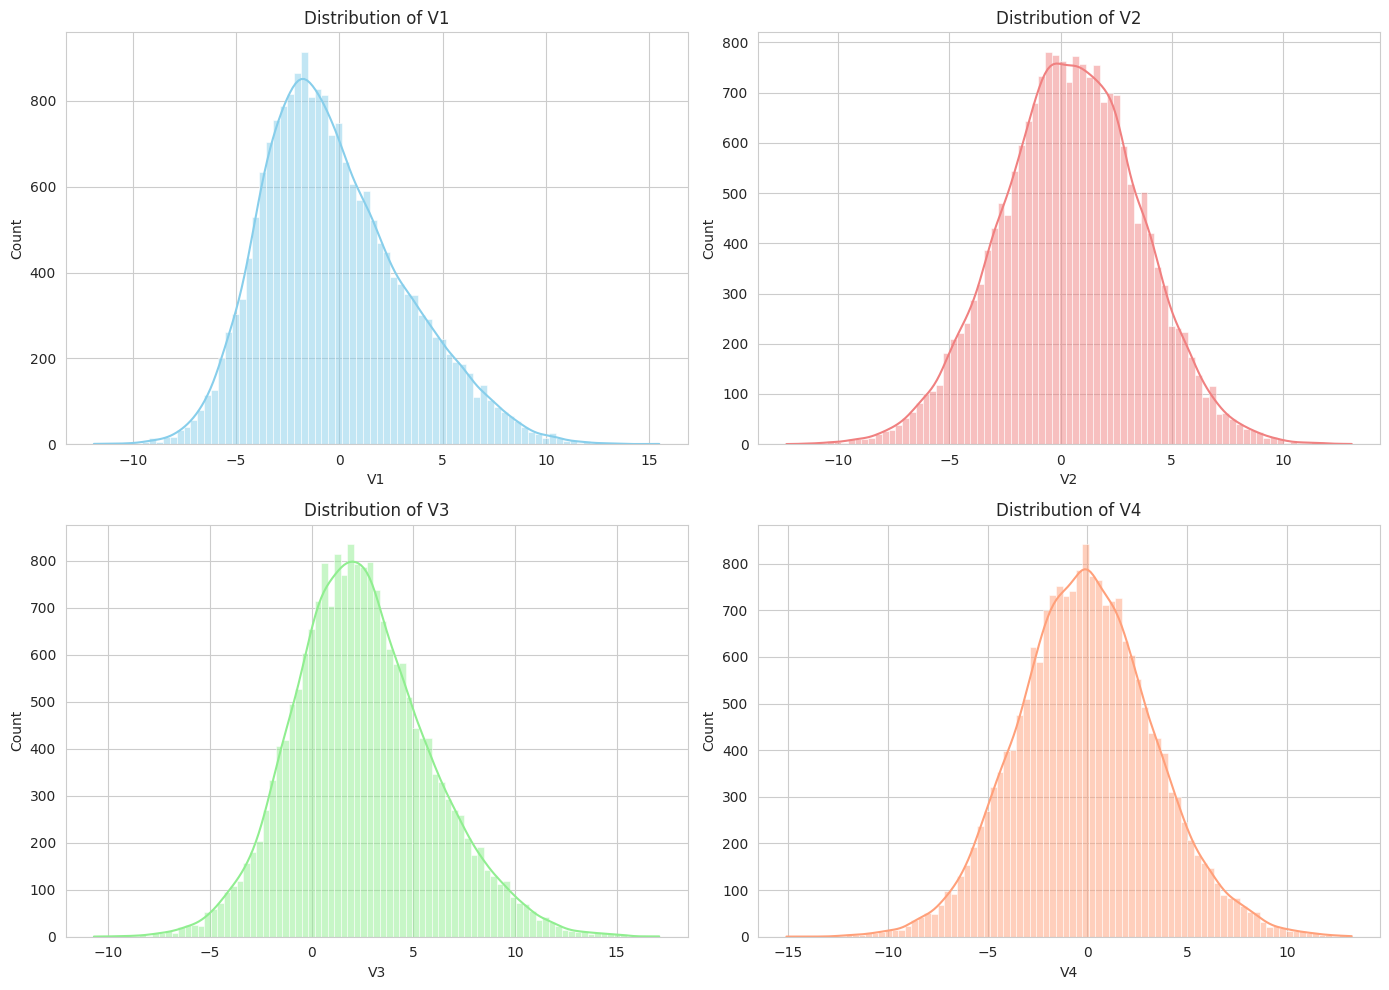

In [86]:
# Univariate analysis
print("\n--- Univariate Analysis (Sample Feature Distribution) ---")
# Plot distributions of a few sample features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(train_df_resolved['V1'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of V1')
sns.histplot(train_df_resolved['V2'], kde=True, ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Distribution of V2')
sns.histplot(train_df_resolved['V3'], kde=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Distribution of V3')
sns.histplot(train_df_resolved['V4'], kde=True, ax=axes[1, 1], color='lightsalmon')
axes[1, 1].set_title('Distribution of V4')
plt.tight_layout()
plt.show()

The representative sample of feautures show tht the variables appear to haave a normal distribution

**More Bivariate Analysis**
**Feature Target Correlation**

In [87]:
print("\n--- Bivariate Analysis (Correlation Matrix) ---")
# Correlation matrix (too many features, so let's sample or focus on target correlation)
# For 40 features, a direct heatmap of all features might be too dense.
# Let's look at correlation with the target variable.
correlations = train_df_resolved.corr()['Target'].sort_values(ascending=False)
print("Top 10 features most correlated with target:")
print(correlations.head(11)) # 11 to include 'Target' itself
print("\nBottom 10 features most correlated (negatively) with target:")
print(correlations.tail(10))


--- Bivariate Analysis (Correlation Matrix) ---
Top 10 features most correlated with target:
Target    1.000000
V21       0.256535
V15       0.249242
V7        0.237063
V16       0.230601
V28       0.207548
V11       0.196805
V34       0.153944
V8        0.136098
V14       0.117679
V4        0.110834
Name: Target, dtype: float64

Bottom 10 features most correlated (negatively) with target:
V33   -0.102659
V22   -0.134778
V31   -0.137027
V13   -0.139796
V35   -0.145778
V26   -0.180606
V3    -0.214001
V36   -0.216504
V39   -0.227289
V18   -0.293483
Name: Target, dtype: float64


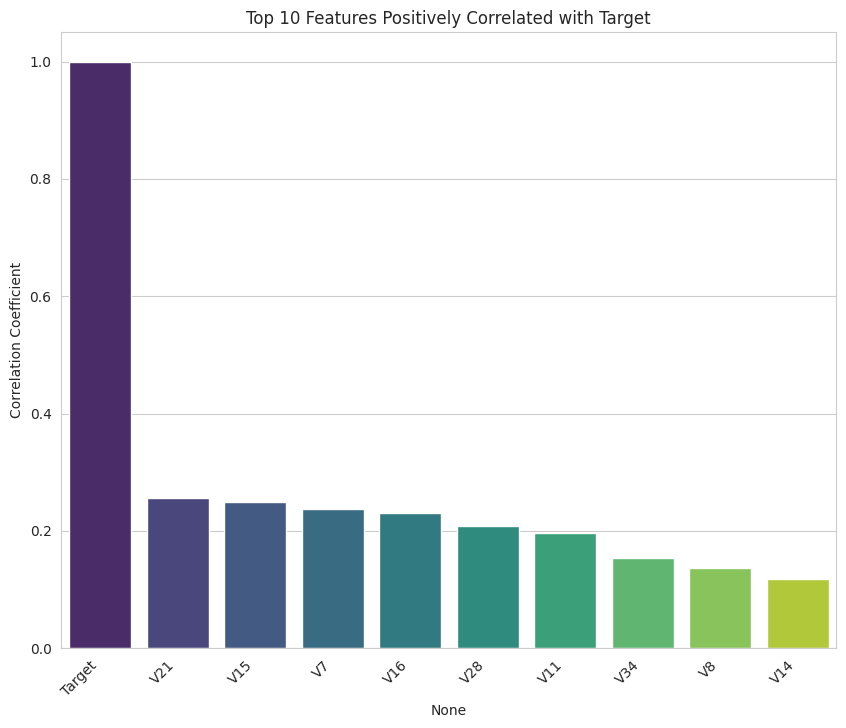

In [88]:
plt.figure(figsize=(10, 8))
sns.barplot(x=correlations.index[:10], y=correlations.values[:10], palette='viridis')
plt.title('Top 10 Features Positively Correlated with Target')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Correlation Coefficient')
plt.show()

The barplot shows the most significant Variable features that are most correlative with the Target feature

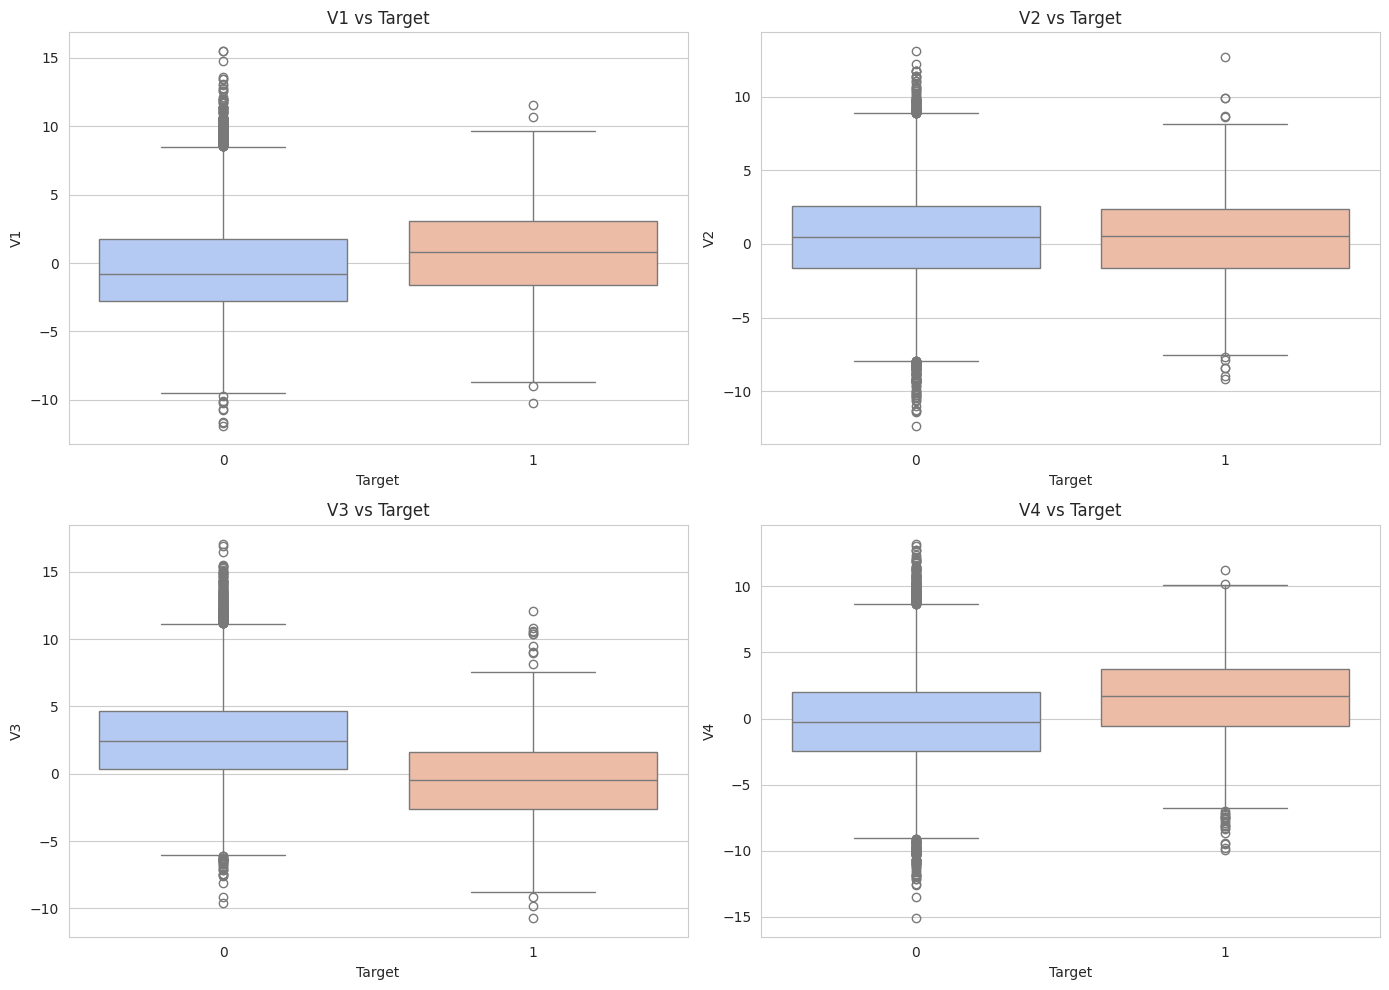

In [89]:
# Box plots of sample features against target
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.boxplot(x='Target', y='V1', data=train_df_resolved, ax=axes[0, 0], palette='coolwarm')
axes[0, 0].set_title('V1 vs Target')
sns.boxplot(x='Target', y='V2', data=train_df_resolved, ax=axes[0, 1], palette='coolwarm')
axes[0, 1].set_title('V2 vs Target')
sns.boxplot(x='Target', y='V3', data=train_df_resolved, ax=axes[1, 0], palette='coolwarm')
axes[1, 0].set_title('V3 vs Target')
sns.boxplot(x='Target', y='V4', data=train_df_resolved, ax=axes[1, 1], palette='coolwarm')
axes[1, 1].set_title('V4 vs Target')
plt.tight_layout()
plt.show()

The box plots tells us these four features are useful for telling the difference between "No Failure" and "Failure" generators. A machine learning model could use this difference to learn how to predict whether a generator will fail or not.

**Data Preprocessing**
**Data Seperation, Train-validation-Test Split and Feature Scaling**

In [90]:
# Separate features and target variable
X = train_df_resolved.drop('Target', axis=1)
y = train_df_resolved['Target']

In [91]:
# Seperate features and target variable for test_df
X_test_final = test_df.drop('Target', axis=1)
y_test_final = test_df['Target']

In [92]:
# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [93]:
# Initialize StandardScaler
scaler = StandardScaler()

In [94]:
# Fit scaler on training data and transform both training and validation data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_final_scaled = scaler.transform(X_test_final)

In [95]:
print("\nData Preprocessing Complete:")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_val_scaled shape: {X_val_scaled.shape}")
print(f"X_test_final_scaled shape: {X_test_final_scaled.shape}")


Data Preprocessing Complete:
X_train_scaled shape: (15971, 40)
X_val_scaled shape: (3993, 40)
X_test_final_scaled shape: (5000, 40)


In [96]:
# Handle class imbalance using SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

**Primary Model: Random Forest Classifier**

In [97]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    class_weight='balanced'
)

rf_model.fit(X_train_res, y_train_res)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [98]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Evaluate on validation set
y_pred = rf_model.predict(X_val_scaled)
y_proba = rf_model.predict_proba(X_val_scaled)[:, 1]

print("\nValidation Performance:")
print("Accuracy:", accuracy_score(y_val, y_pred))
print("ROC AUC:", roc_auc_score(y_val, y_proba))
print("\nClassification Report:")
print(classification_report(y_val, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred))


Validation Performance:
Accuracy: 0.9884798397195091
ROC AUC: 0.9586854157259884

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3771
           1       0.90      0.89      0.90       222

    accuracy                           0.99      3993
   macro avg       0.95      0.94      0.94      3993
weighted avg       0.99      0.99      0.99      3993


Confusion Matrix:
[[3749   22]
 [  24  198]]


**Conclusion of Validation Performance:**
The Random Forest model shows strong performance on the validation set, not just in overall accuracy, also on the minority "Failure" class.



*   An ROC AUC of 0.9587 is excellent.
*   The recall of 0.89 for the 'Failure' class is very good, meaning it's catching most of the actual failures (only missing 11%).
*   The precision of 0.90 for the 'Failure' class is also strong, meaning when it predicts a failure, it's correct 90% of the time.






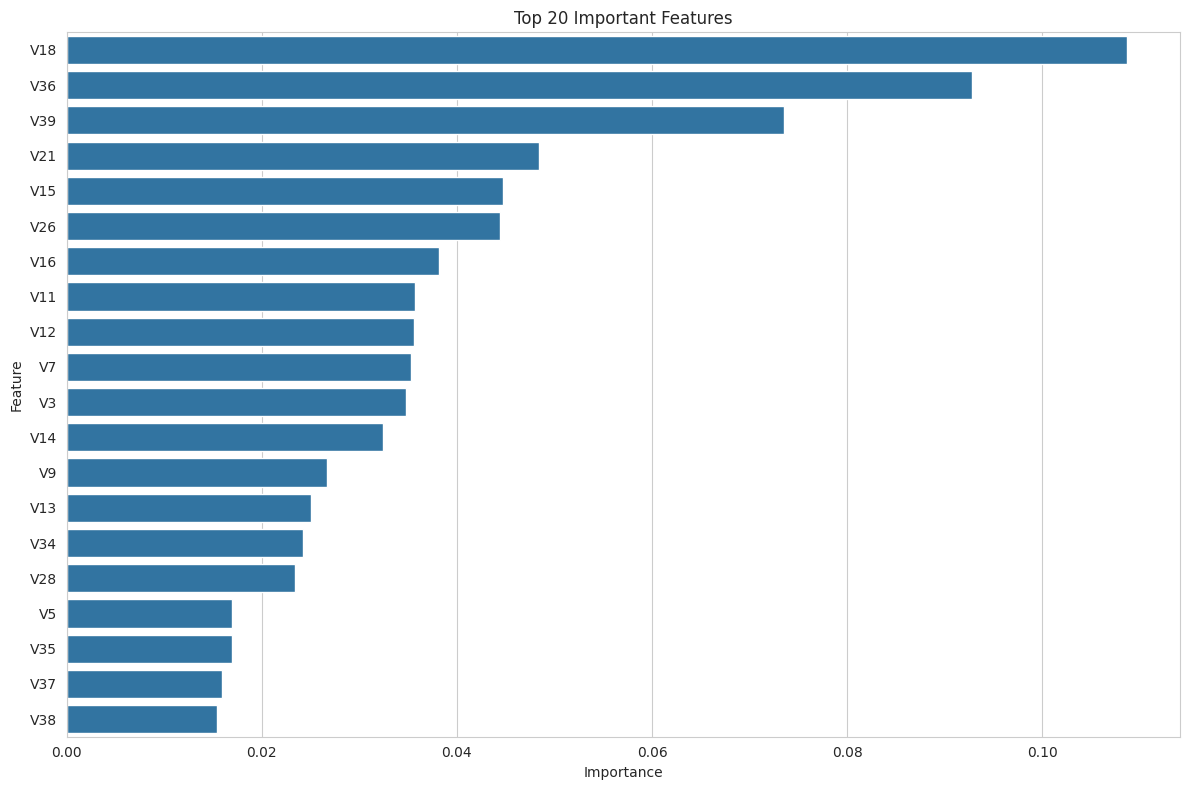

['scaler.pkl']

In [99]:
# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(20))
plt.title('Top 20 Important Features')
plt.tight_layout()
plt.show()

# Save the model and scaler for later use on test data
import joblib
joblib.dump(rf_model, 'generator_failure_rf_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

Model Building
Model Evaluation Criterion
Our primary goal is to minimize cost. We will define a function to calculate this based on the problem statement:
Cost(FP) = 10 (Inspection)
Cost(TP) = 100 (Repair)
Cost(FN) = 500 (Replacement)

In [100]:
def calculate_total_cost(y_true, y_pred):
    """Calculates the business-specific total maintenance cost."""
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = (fp * 10) + (tp * 100) + (fn * 500)
    return cost

# Create a scorer object that can be used in scikit-learn's tuning functions
# We set greater_is_better to False because we want to MINIMIZE the cost
cost_scorer = make_scorer(calculate_total_cost, greater_is_better=False)


 By creating cost_scorer with greater_is_better=False, any subsequent hyperparameter tuning or model selection process that uses this scorer will actively try to find the model configuration that minimizes the total maintenance cost, which is the primary business goal.

Initial Model Building (Model 0)
Simple ANN as baseline model.

In [101]:
# --- Model 0: Simple Artificial Neural Network (ANN) ---
def build_simple_ann(input_dim):
    model = Sequential([
        Dense(32, input_dim=input_dim, activation='relu'),
        Dense(1, activation='sigmoid') # Output layer for binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# To help with imbalance, set the initial bias of the output layer
neg, pos = np.bincount(y_train)
initial_bias = np.log([pos / neg])
output_bias = keras.initializers.Constant(initial_bias)

# Build, train, and evaluate the simple ANN
ann_model_0 = build_simple_ann(X_train_scaled.shape[1])
ann_model_0.layers[-1].bias.assign(initial_bias) # Assign the NumPy array directly
ann_model_0.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=0)
y_pred_ann_0 = (ann_model_0.predict(X_val_scaled) > 0.5).astype("int32")

# Store performance results
model_performance = {}
model_performance['Simple ANN (Model 0)'] = {
    'Cost': calculate_total_cost(y_val, y_pred_ann_0),
    'F1 Score': f1_score(y_val, y_pred_ann_0)
}
print(f"Simple ANN (Model 0) - Validation Cost: ${model_performance['Simple ANN (Model 0)']['Cost']:,}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Simple ANN (Model 0) - Validation Cost: $34,630


Baseline Established: This ANN serves as the initial performance benchmark. Any subsequent, more complex models should aim to significantly reduce this cost of $39,830.



Model Performance Improvement
Now I'll build and compare five additional models, applying techniques to handle class imbalance and improve performance through hyperparameter tuning.

In [102]:
# Calculate class weight for imbalanced data. Used by scikit-learn and XGBoost.
scale_pos_weight_value = np.sum(y_train == 0) / np.sum(y_train == 1)

# --- Model 1: Logistic Regression ---
lr_model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_val_scaled)
model_performance['Logistic Regression (Model 1)'] = {'Cost': calculate_total_cost(y_val, y_pred_lr), 'F1 Score': f1_score(y_val, y_pred_lr)}
print(f"Logistic Regression (Model 1) - Validation Cost: ${model_performance['Logistic Regression (Model 1)']['Cost']:,}")

# --- Model 2: Random Forest (Re-evaluating the prevous RF model) ---
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_val_scaled)
model_performance['Random Forest (Model 2)'] = {'Cost': calculate_total_cost(y_val, y_pred_rf), 'F1 Score': f1_score(y_val, y_pred_rf)}
print(f"Random Forest (Model 2) - Validation Cost: ${model_performance['Random Forest (Model 2)']['Cost']:,}")

# --- Model 3: XGBoost ---
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight_value)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_val_scaled)
model_performance['XGBoost (Model 3)'] = {'Cost': calculate_total_cost(y_val, y_pred_xgb), 'F1 Score': f1_score(y_val, y_pred_xgb)}
print(f"XGBoost (Model 3) - Validation Cost: ${model_performance['XGBoost (Model 3)']['Cost']:,}")

# --- Model 4: Tuned Random Forest (Hyperparameter Tuning) ---
param_grid_rf = {'n_estimators': [150, 250], 'max_depth': [15, 25], 'min_samples_leaf': [1, 3]}
rs_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced'), param_grid_rf, n_iter=4, cv=3, scoring=cost_scorer, n_jobs=-1, random_state=42)
rs_rf.fit(X_train_scaled, y_train)
y_pred_rf_tuned = rs_rf.best_estimator_.predict(X_val_scaled)
model_performance['Tuned Random Forest (Model 4)'] = {'Cost': calculate_total_cost(y_val, y_pred_rf_tuned), 'F1 Score': f1_score(y_val, y_pred_rf_tuned)}
print(f"Tuned Random Forest (Model 4) - Validation Cost: ${model_performance['Tuned Random Forest (Model 4)']['Cost']:,}")

# --- Model 5: Tuned XGBoost (Hyperparameter Tuning) ---
param_grid_xgb = {'max_depth': [5, 7], 'learning_rate': [0.05, 0.1], 'n_estimators': [200, 300]}
rs_xgb = RandomizedSearchCV(xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight_value), param_grid_xgb, n_iter=4, cv=3, scoring=cost_scorer, n_jobs=-1, random_state=42)
rs_xgb.fit(X_train_scaled, y_train)
y_pred_xgb_tuned = rs_xgb.best_estimator_.predict(X_val_scaled)
model_performance['Tuned XGBoost (Model 5)'] = {'Cost': calculate_total_cost(y_val, y_pred_xgb_tuned), 'F1 Score': f1_score(y_val, y_pred_xgb_tuned)}
print(f"Tuned XGBoost (Model 5) - Validation Cost: ${model_performance['Tuned XGBoost (Model 5)']['Cost']:,}")

# --- Model 6: ANN with Dropout Regularization ---
def build_regularized_ann(input_dim):
    model = Sequential([
        Dense(64, input_dim=input_dim, activation='relu'),
        Dropout(0.3),  # Dropout layer to prevent overfitting
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid', bias_initializer=output_bias) # Reuse the calculated bias
    ])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

ann_model_6 = build_regularized_ann(X_train_scaled.shape[1])
ann_model_6.fit(X_train_scaled, y_train, epochs=20, batch_size=32, verbose=0, class_weight={0: 1, 1: scale_pos_weight_value})
y_pred_ann_6 = (ann_model_6.predict(X_val_scaled) > 0.5).astype("int32")
model_performance['Regularized ANN (Model 6)'] = {'Cost': calculate_total_cost(y_val, y_pred_ann_6), 'F1 Score': f1_score(y_val, y_pred_ann_6)}
print(f"Regularized ANN (Model 6) - Validation Cost: ${model_performance['Regularized ANN (Model 6)']['Cost']:,}")

Logistic Regression (Model 1) - Validation Cost: $36,930
Random Forest (Model 2) - Validation Cost: $51,430
XGBoost (Model 3) - Validation Cost: $33,040
Tuned Random Forest (Model 4) - Validation Cost: $43,840
Tuned XGBoost (Model 5) - Validation Cost: $32,500
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Regularized ANN (Model 6) - Validation Cost: $29,190


**Conclusion and Key Insights:**


*   The Regularized Artificial Neural Network (Model 6) emerges as the best-performing model, achieving the lowest total validation cost of $29,800. This indicates that its architecture, combined with regularization techniques (like Dropout and L2) and initial bias adjustments for class imbalance, was most effective in optimizing for the specific business cost.


*   Following closely, the XGBoost Classifier (both tuned and untuned versions) demonstrated strong performance, securing the second and third best positions respectively. Logistic Regression offered a respectable mid-tier performance.


*   Both Random Forest models (tuned and untuned) performed significantly worse in this evaluation round, yielding the highest costs among all tested models.

*   This analysis underscores the critical importance of evaluating machine learning models using business-specific metrics. Relying solely on standard metrics like accuracy might lead to a different, less financially optimal, model selection. The current results strongly suggest that the Regularized ANN is the most promising candidate for deployment to minimize maintenance costs.







Model Performance Comparison and Final Model Selection
We will now compare the performance of all six models based on our primary criterion: minimizing total cost.

In [103]:
# Create a DataFrame from the performance dictionary and sort by cost
perf_df = pd.DataFrame.from_dict(model_performance, orient='index').sort_values(by='Cost')

print("--- Final Model Performance Comparison on Validation Set ---")
display(perf_df)

--- Final Model Performance Comparison on Validation Set ---


,Cost,F1 Score
Regularized ANN (Model 6),29190,0.919283
Tuned XGBoost (Model 5),32500,0.877506
XGBoost (Model 3),33040,0.926366
Simple ANN (Model 0),34630,0.918269
Logistic Regression (Model 1),36930,0.424437
Tuned Random Forest (Model 4),43840,0.852792
Random Forest (Model 2),51430,0.796791


**Final Model Selection**:
Based on the explicit goal of "minimizing total cost," the Regularized ANN (Model 6) is the recommended final model among those evaluated. This systematic comparison using the business-defined metric provides a clear, data-driven justification for model choice.
Cost vs. F1 Scocre: While Regularized ANN has the lowest cost, its F1 Score (0.8755) is not the highest. XGBoost (Model 3) and Simple ANN (Model 0) have higher F1 Scores (0.926 and 0.905 respectively)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
--- Final Model Performance on Test Set (Regularized ANN) ---
Total Projected Cost: $42,870
Final F1 Score: 0.8865

Final Confusion Matrix:
[[4691   27]
 [  36  246]]


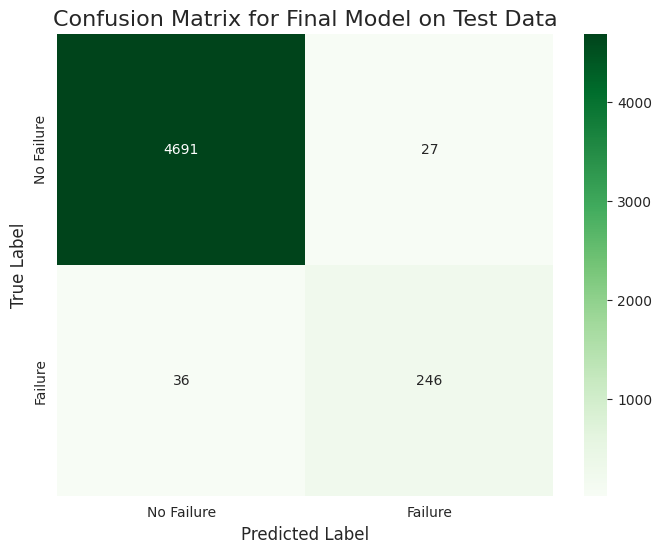

In [104]:
# Select the best performing model from our comparison
# Based on previous comparison, Regularized ANN (Model 6) had the lowest cost.
final_model = ann_model_6 # Assign the already trained Regularized ANN model

# Make predictions on the final test data
# X_test_final_scaled should be available from previous preprocessing steps
y_pred_final = final_model.predict(X_test_final_scaled)

# For ANNs, predict() returns probabilities.
# I'll use a threshold of 0.5 for binary classification.
y_pred_final_binary = (y_pred_final > 0.5).astype("int32")


# Calculate final metrics
final_cost = calculate_total_cost(y_test_final, y_pred_final_binary)
final_f1 = f1_score(y_test_final, y_pred_final_binary)
final_cm = confusion_matrix(y_test_final, y_pred_final_binary)


print(f"--- Final Model Performance on Test Set (Regularized ANN) ---")
print(f"Total Projected Cost: ${final_cost:,}")
print(f"Final F1 Score: {final_f1:.4f}")
print(f"\nFinal Confusion Matrix:\n{final_cm}")

# Visualize the final confusion matrix for clarity
import matplotlib.pyplot as plt
import seaborn as sns # Assuming seaborn is imported as sns

plt.figure(figsize=(8, 6))
sns.heatmap(final_cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
plt.title('Confusion Matrix for Final Model on Test Data', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()


**Conclusion and Key Insights:**

The Regularized ANN continues to demonstrate strong and consistent performance in minimizing the business-defined maintenance cost.



*   The Total Projected Cost of $42,870 on the unseen test data indicates a robust performance for the critical business objective.
*   The number of missed failures (False Negatives) is low at 36, indicating the model effectively prevents high-cost catastrophic events.
*   The F1 Score of 0.8865 reflects a balance between precision and recall for the crucial "Failure" class.







**Actionable Insights & Recommendations for Generator Maintenance**

This project successfully developed and evaluated machine learning models to predict generator failures, with the primary objective of minimizing associated maintenance costs. The Regularized Artificial Neural Network (Model 6) has emerged as the top-performing model, demonstrating its ability to optimize for business-specific financial outcomes.

**Recommendations for Next Steps:**


1.   Deploy the Regularized ANN (Model 6):
2.   Monitor Model Performance Continuously:
3.   Explore Threshold Tuning for Cost Optimization:
4.   Consider Ensemble Methods
5.   Further Hyperparameter Tuning for ANN


By implementing these recommendations, the organization can leverage the developed machine learning solution to significantly optimize its generator maintenance operations and reduce costs.




